<a href="https://colab.research.google.com/github/MedjialeuJordan/Machine-Learning-Projects/blob/main/MNIST_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚡**Modele de reconnaissance d'image entrainer sur le MNIST Dataset**

In [1]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Dimensionement du dataset



In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

X_train = X_train / 255
X_test = X_test / 255 ##Normalisation

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)  ##Redimensionement afin de pouvoir passer l'image dans le CNN

print("Taille du dataset:",X_train.shape,y_train.shape)

Taille du dataset: (60000, 28, 28, 1) (60000,)


Modele CNN

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



Entrainement

In [6]:
from IPython.core import history
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.6091 - loss: 1.1435 - val_accuracy: 0.9231 - val_loss: 0.2496
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9312 - loss: 0.2259 - val_accuracy: 0.9544 - val_loss: 0.1439
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9589 - loss: 0.1357 - val_accuracy: 0.9711 - val_loss: 0.0970
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9688 - loss: 0.1017 - val_accuracy: 0.9758 - val_loss: 0.0754
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9738 - loss: 0.0849 - val_accuracy: 0.9764 - val_loss: 0.0712
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9761 - loss: 0.0756 - val_accuracy: 0.9808 - val_loss: 0.0630
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9789 - loss: 0.0686 - val_accuracy: 0.9804 - val_loss: 0.0605
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9820 -

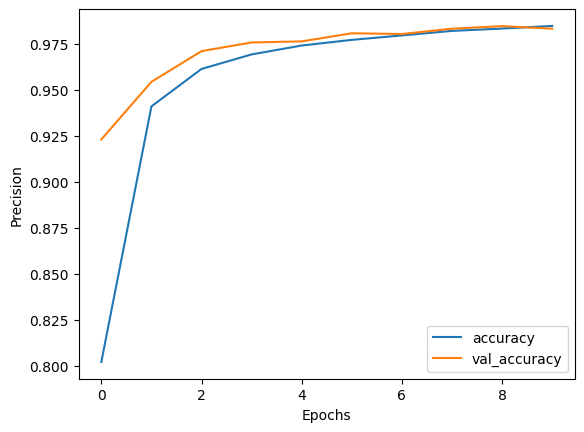

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.show()

Final Evaluation

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9791 - loss: 0.0625
Test accuracy: 0.98


Prediction

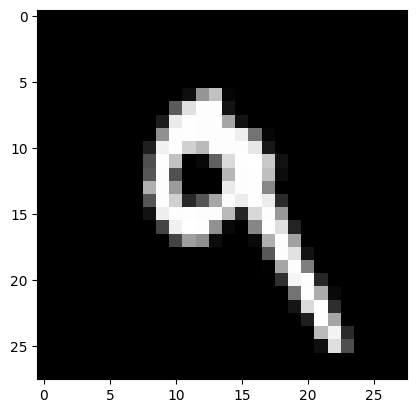

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Chiffre predit: 9


In [15]:
import numpy as np

index=7
img=X_test[index]
plt.imshow(img.reshape(28,28),cmap='gray')
plt.show()

pred = model.predict(np.expand_dims(img,axis=0))
print("Chiffre predit:", np.argmax(pred))